In [1]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "uberdata"

In [2]:
library(ggplot2)
library(ggthemes)
library(ggthemes)
library(lubridate)
library(dplyr)
library(tidyr)
library(DT)
library(scales)



Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [3]:
colors = c("#CC1011", "#665555", "#05a399", "#cfcaca", "#f5e840", "#0683c9", "#e075b0")


In [4]:
apr_data <- read.csv("../input/uberdata/uber-raw-data-apr14.csv")
may_data <- read.csv("../input/uberdata/uber-raw-data-may14.csv")
jun_data <- read.csv("../input/uberdata/uber-raw-data-jun14.csv")
jul_data <- read.csv("../input/uberdata/uber-raw-data-jul14.csv")
aug_data <- read.csv("../input/uberdata/uber-raw-data-aug14.csv")
sep_data <- read.csv("../input/uberdata/uber-raw-data-sep14.csv")

In [5]:
data_2014 <- rbind(apr_data,may_data, jun_data, jul_data, aug_data, sep_data)
data_2014$Date.Time <- as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S")
data_2014$Time <- format(as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S"), format="%H:%M:%S")
data_2014


Date.Time           Lat     Lon      Base   Time    
1       2014-04-01 00:11:00 40.7690 -73.9549 B02512 00:11:00
2       2014-04-01 00:17:00 40.7267 -74.0345 B02512 00:17:00
3       2014-04-01 00:21:00 40.7316 -73.9873 B02512 00:21:00
4       2014-04-01 00:28:00 40.7588 -73.9776 B02512 00:28:00
5       2014-04-01 00:33:00 40.7594 -73.9722 B02512 00:33:00
6       2014-04-01 00:33:00 40.7383 -74.0403 B02512 00:33:00
7       2014-04-01 00:39:00 40.7223 -73.9887 B02512 00:39:00
8       2014-04-01 00:45:00 40.7620 -73.9790 B02512 00:45:00
9       2014-04-01 00:55:00 40.7524 -73.9960 B02512 00:55:00
10      2014-04-01 01:01:00 40.7575 -73.9846 B02512 01:01:00
11      2014-04-01 01:19:00 40.7256 -73.9869 B02512 01:19:00
12      2014-04-01 01:48:00 40.7591 -73.9684 B02512 01:48:00
13      2014-04-01 01:49:00 40.7271 -73.9803 B02512 01:49:00
14      2014-04-01 02:11:00 40.6463 -73.7896 B02512 02:11:00
15      2014-04-01 02:25:00 40.7564 -73.9167 B02512 02:25:00
16      2014-04-01 02:31:00 40.7666 -73.9531 B02512 02:31:00
17      2014-04-01 02:43:00 40.7580 -73.9761 B02512 02:43:00
18      2014-04-01 03:22:00 40.7238 -73.9821 B02512 03:22:00
19      2014-04-01 03:35:00 40.7531 -74.0039 B02512 03:35:00
20      2014-04-01 03:35:00 40.7389 -74.0393 B02512 03:35:00
21      2014-04-01 03:41:00 40.7619 -73.9715 B02512 03:41:00
22      2014-04-01 04:11:00 40.7530 -74.0042 B02512 04:11:00
23      2014-04-01 04:15:00 40.6561 -73.9531 B02512 04:15:00
24      2014-04-01 04:19:00 40.7250 -73.9844 B02512 04:19:00
25      2014-04-01 04:20:00 40.6950 -74.1783 B02512 04:20:00
26      2014-04-01 04:26:00 40.9859 -74.1578 B02512 04:26:00
27      2014-04-01 04:27:00 40.6879 -74.1814 B02512 04:27:00
28      2014-04-01 04:38:00 40.6878 -74.1816 B02512 04:38:00
29      2014-04-01 04:47:00 40.7234 -73.9974 B02512 04:47:00
30      2014-04-01 04:49:00 40.7336 -73.9900 B02512 04:49:00
⋮       ⋮                   ⋮       ⋮        ⋮      ⋮       
4534298 2014-09-30 22:49:00 40.7079 -74.0061 B02764 22:49:00
4534299 2014-09-30 22:50:00 40.7775 -73.9468 B02764 22:50:00
4534300 2014-09-30 22:51:00 40.7383 -73.9923 B02764 22:51:00
4534301 2014-09-30 22:51:00 40.6596 -73.9479 B02764 22:51:00
4534302 2014-09-30 22:51:00 40.7130 -73.7976 B02764 22:51:00
4534303 2014-09-30 22:51:00 40.7480 -74.0007 B02764 22:51:00
4534304 2014-09-30 22:51:00 40.7109 -73.9337 B02764 22:51:00
4534305 2014-09-30 22:52:00 40.8287 -73.9488 B02764 22:52:00
4534306 2014-09-30 22:52:00 40.7452 -73.9278 B02764 22:52:00
4534307 2014-09-30 22:52:00 40.7517 -73.9866 B02764 22:52:00
4534308 2014-09-30 22:53:00 40.7724 -73.9587 B02764 22:53:00
4534309 2014-09-30 22:53:00 40.7234 -73.9913 B02764 22:53:00
4534310 2014-09-30 22:53:00 40.7417 -74.0038 B02764 22:53:00
4534311 2014-09-30 22:53:00 40.7509 -73.9785 B02764 22:53:00
4534312 2014-09-30 22:53:00 40.7588 -73.9721 B02764 22:53:00
4534313 2014-09-30 22:54:00 40.6932 -73.9693 B02764 22:54:00
4534314 2014-09-30 22:54:00 40.7273 -74.0057 B02764 22:54:00
4534315 2014-09-30 22:54:00 40.7594 -73.9820 B02764 22:54:00
4534316 2014-09-30 22:55:00 40.7520 -74.0027 B02764 22:55:00
4534317 2014-09-30 22:55:00 40.7205 -73.9571 B02764 22:55:00
4534318 2014-09-30 22:56:00 40.7371 -74.0289 B02764 22:56:00
4534319 2014-09-30 22:56:00 40.6446 -73.7823 B02764 22:56:00
4534320 2014-09-30 22:56:00 40.7163 -73.9623 B02764 22:56:00
4534321 2014-09-30 22:57:00 40.6979 -73.9365 B02764 22:57:00
4534322 2014-09-30 22:57:00 40.7300 -73.9565 B02764 22:57:00
4534323 2014-09-30 22:57:00 40.7668 -73.9845 B02764 22:57:00
4534324 2014-09-30 22:57:00 40.6911 -74.1773 B02764 22:57:00
4534325 2014-09-30 22:58:00 40.8519 -73.9319 B02764 22:58:00
4534326 2014-09-30 22:58:00 40.7081 -74.0066 B02764 22:58:00
4534327 2014-09-30 22:58:00 40.7140 -73.9496 B02764 22:58:00

In [6]:
data_2014$Date.Time <- ymd_hms(data_2014$Date.Time)
data_2014$day <- factor(day(data_2014$Date.Time))
data_2014$month <- factor(month(data_2014$Date.Time, label = TRUE))
data_2014$year <- factor(year(data_2014$Date.Time))
data_2014$dayofweek <- factor(wday(data_2014$Date.Time, label = TRUE))


In [7]:
hour_data <- data_2014 %>%
group_by(Time) %>%
dplyr::summarize(Total = n())


In [8]:
datatable(hour_data)

HTML widgets cannot be represented in plain text (need html)

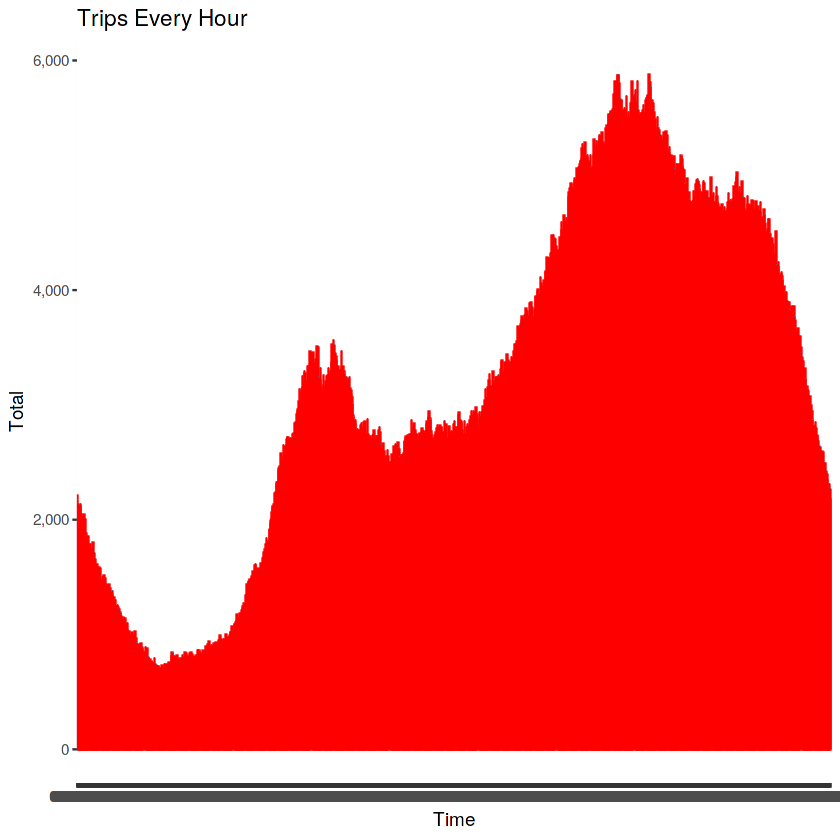

In [9]:
ggplot(hour_data, aes(Time, Total)) +
geom_bar( stat = "identity", fill = "steelblue", color = "red") +
ggtitle("Trips Every Hour") +
theme(legend.position = "none") +
scale_y_continuous(labels = comma)


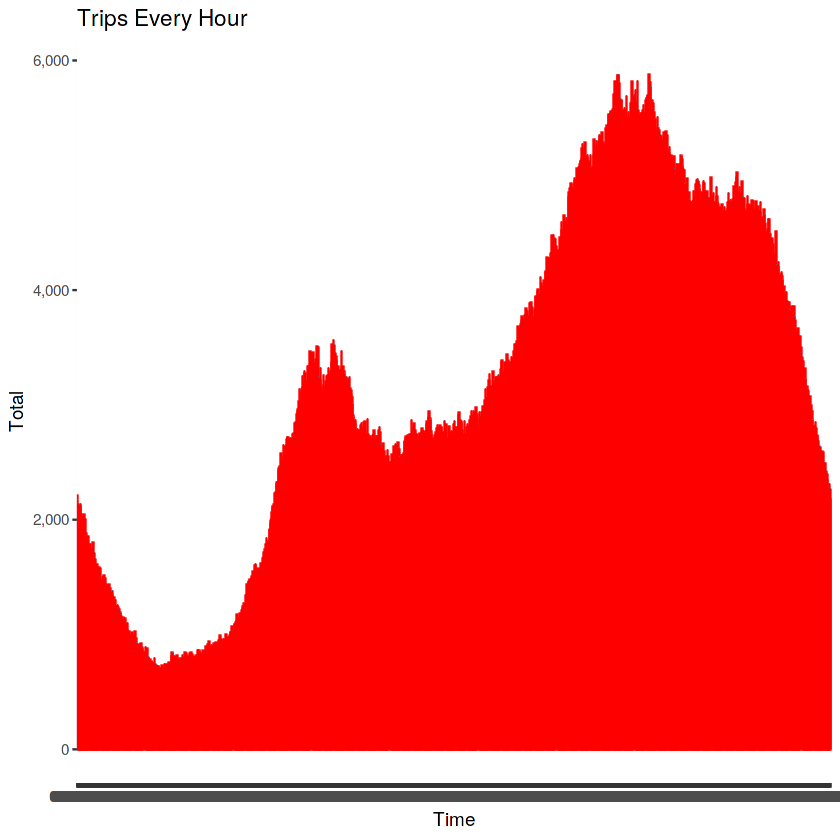

In [10]:
month_hour <- data_2014 %>%
group_by(month, Time) %>%
dplyr::summarize(Total = n())

ggplot(hour_data, aes(Time, Total)) +
geom_bar( stat = "identity", fill = "steelblue", color = "red") +
ggtitle("Trips Every Hour") +
theme(legend.position = "none") +
scale_y_continuous(labels = comma)


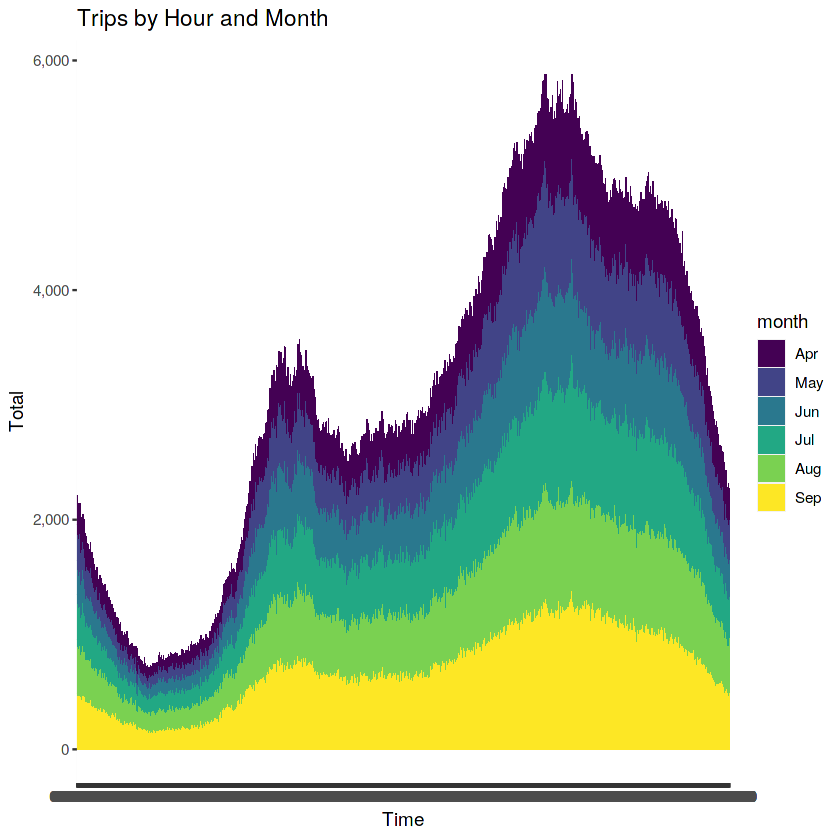

In [11]:
month_hour <- data_2014 %>%
group_by(month, Time) %>%
dplyr::summarize(Total = n())

ggplot(month_hour, aes(Time, Total, fill = month)) +
geom_bar( stat = "identity") +
ggtitle("Trips by Hour and Month") +
scale_y_continuous(labels = comma)


HTML widgets cannot be represented in plain text (need html)

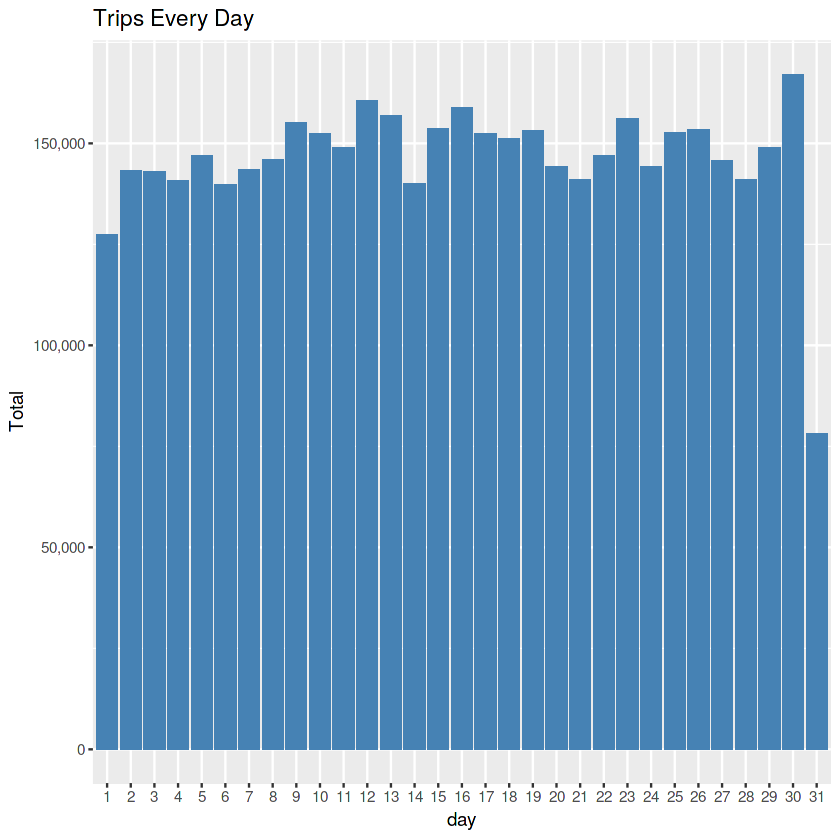

In [12]:
day_group <- data_2014 %>%
  group_by(day) %>%
  dplyr::summarize(Total = n()) 
datatable(day_group)

ggplot(day_group, aes(day, Total)) + 
  geom_bar( stat = "identity", fill = "steelblue") +
  ggtitle("Trips Every Day") +
  theme(legend.position = "none") +
  scale_y_continuous(labels = comma)

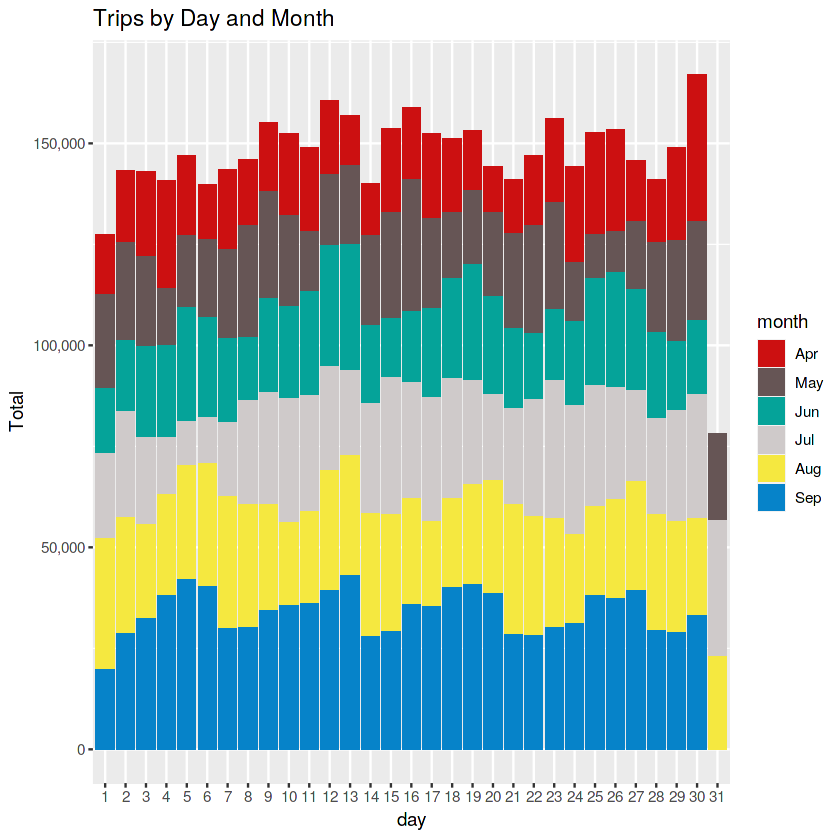

In [13]:
day_month_group <- data_2014 %>%
  group_by(month, day) %>%
  dplyr::summarize(Total = n())

ggplot(day_month_group, aes(day, Total, fill = month)) + 
  geom_bar( stat = "identity") +
  ggtitle("Trips by Day and Month") +
  scale_y_continuous(labels = comma) +
  scale_fill_manual(values = colors)


HTML widgets cannot be represented in plain text (need html)

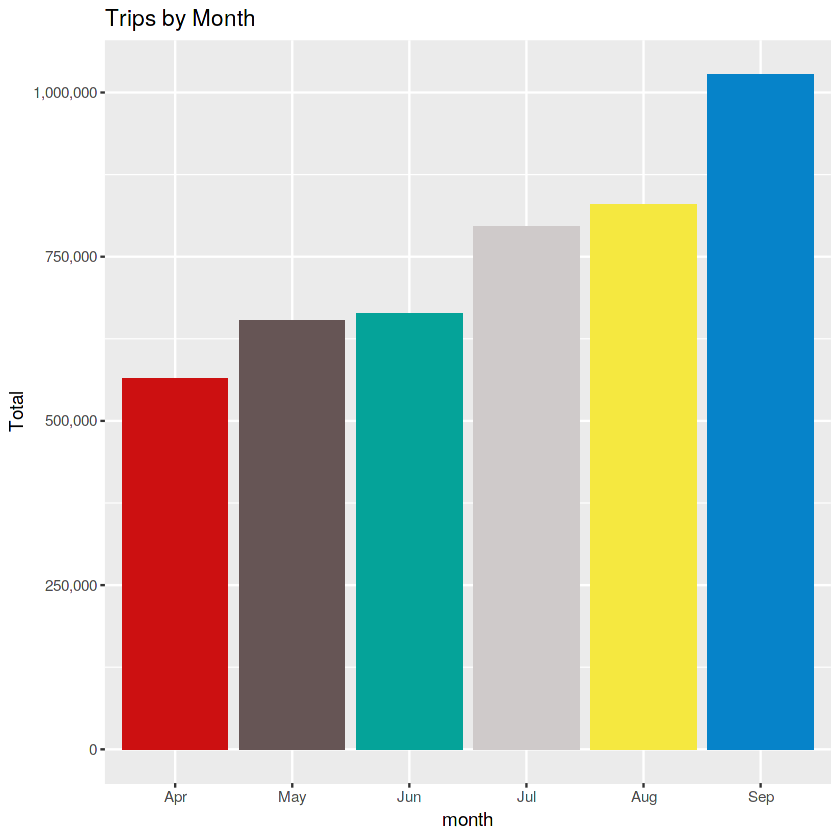

In [14]:
month_group <- data_2014 %>%
  group_by(month) %>%
  dplyr::summarize(Total = n()) 
datatable(month_group)

ggplot(month_group, aes(month, Total, fill = month)) + 
  geom_bar( stat = "identity") +
  ggtitle("Trips by Month") +
  theme(legend.position = "none") +
  scale_y_continuous(labels = comma) +
  scale_fill_manual(values = colors)


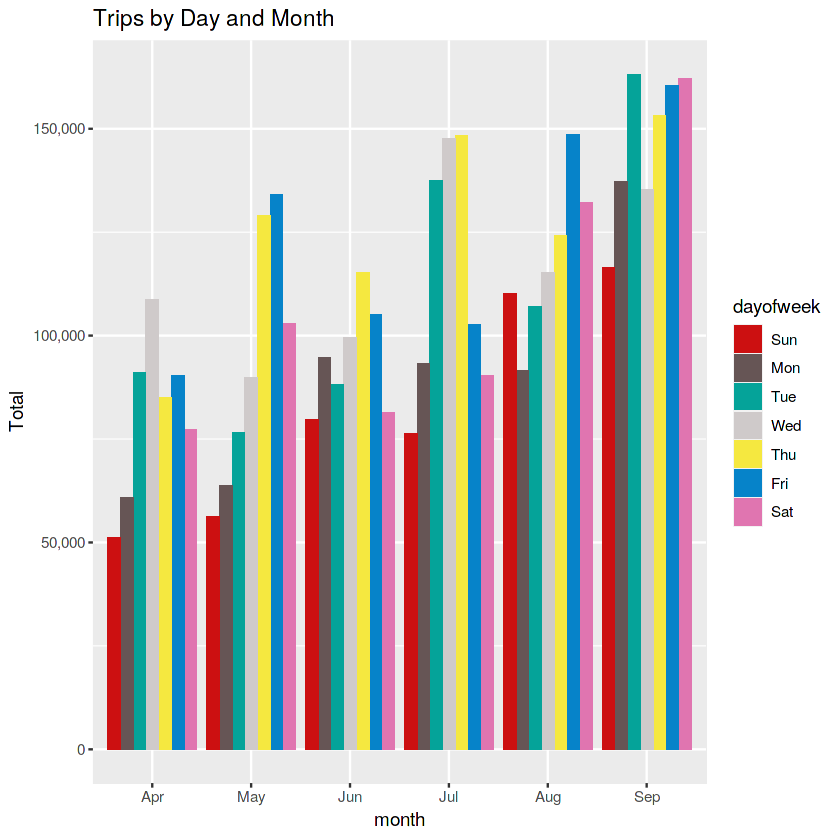

In [15]:
month_weekday <- data_2014 %>%
  group_by(month, dayofweek) %>%
  dplyr::summarize(Total = n())

ggplot(month_weekday, aes(month, Total, fill = dayofweek)) + 
  geom_bar( stat = "identity", position = "dodge") +
  ggtitle("Trips by Day and Month") +
  scale_y_continuous(labels = comma) +
  scale_fill_manual(values = colors)


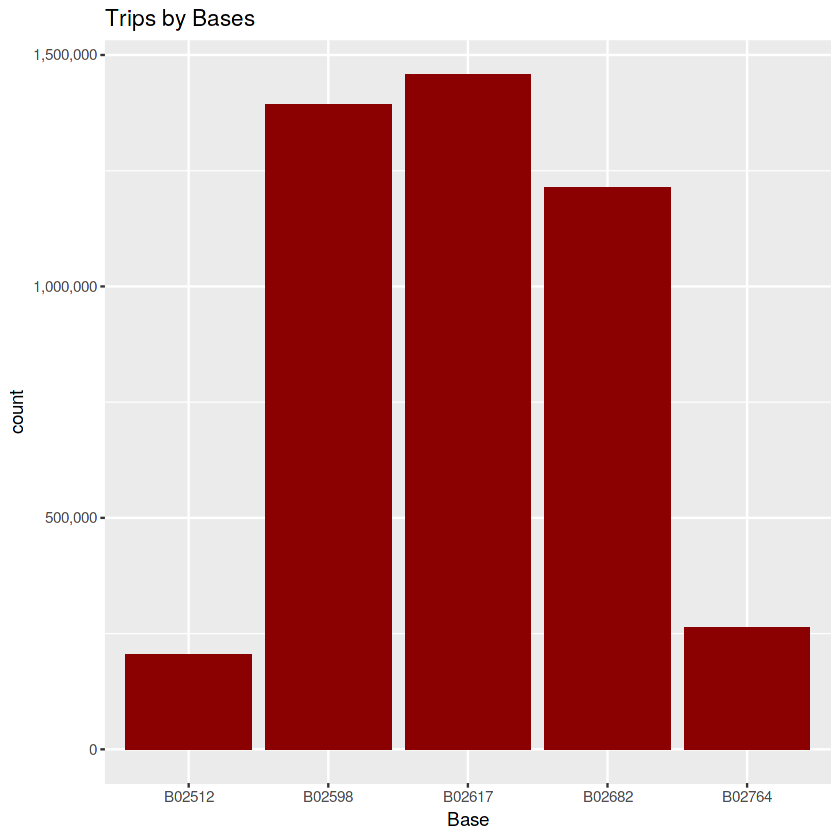

In [16]:
ggplot(data_2014, aes(Base)) + 
  geom_bar(fill = "darkred") +
  scale_y_continuous(labels = comma) +
  ggtitle("Trips by Bases")


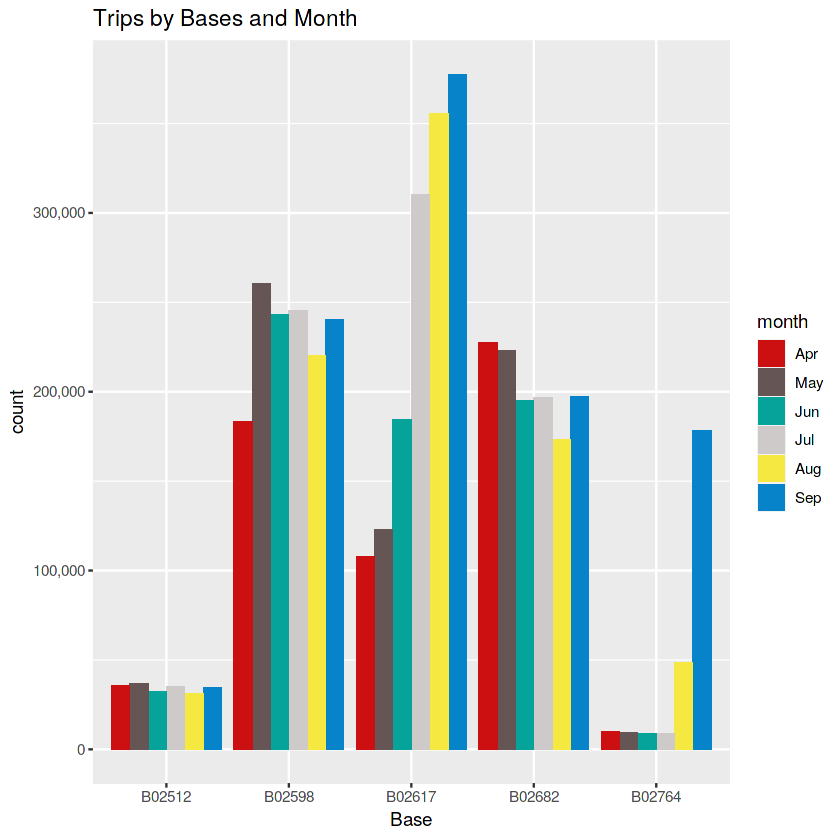

In [17]:
ggplot(data_2014, aes(Base, fill = month)) + 
  geom_bar(position = "dodge") +
  scale_y_continuous(labels = comma) +
  ggtitle("Trips by Bases and Month") +
  scale_fill_manual(values = colors)

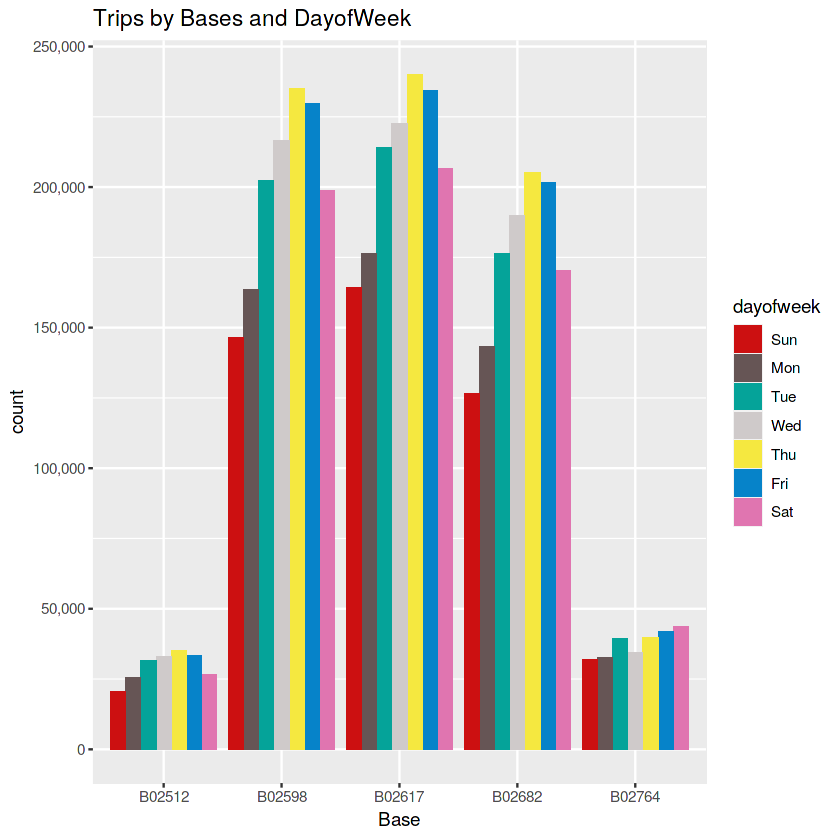

In [18]:
ggplot(data_2014, aes(Base, fill = dayofweek)) + 
  geom_bar(position = "dodge") +
  scale_y_continuous(labels = comma) +
  ggtitle("Trips by Bases and DayofWeek") +
  scale_fill_manual(values = colors)

Warning message in instance$preRenderHook(instance):
“It seems your data is too big for client-side DataTables. You may consider server-side processing: https://rstudio.github.io/DT/server.html”


HTML widgets cannot be represented in plain text (need html)

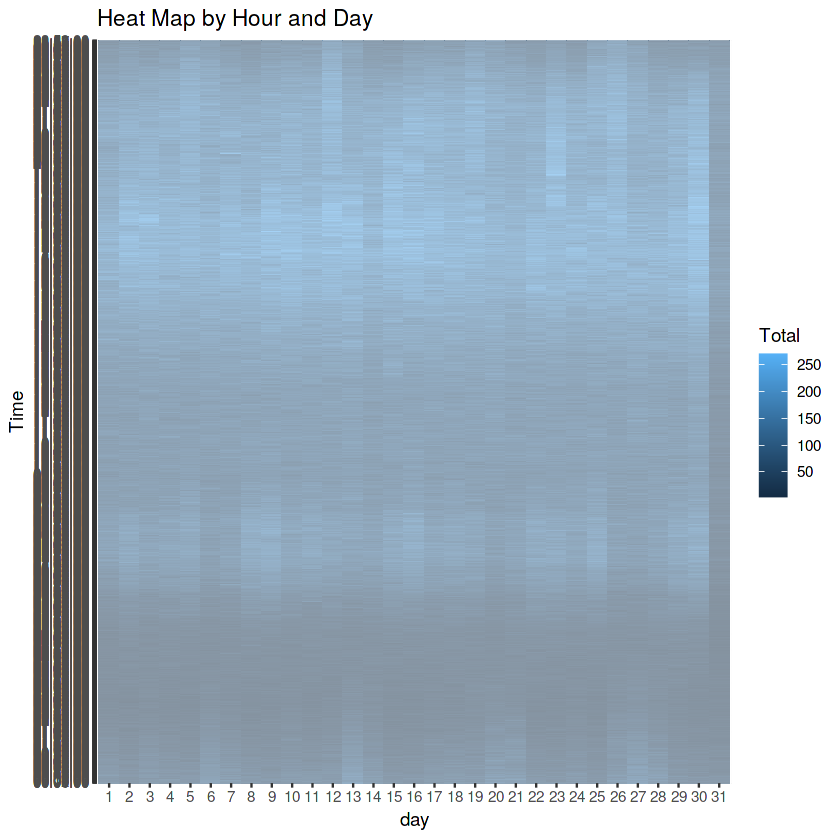

In [19]:
day_and_hour <- data_2014 %>%
  group_by(day, Time) %>%
  dplyr::summarize(Total = n())
datatable(day_and_hour)

ggplot(day_and_hour, aes(day, Time, fill = Total)) +
  geom_tile(color = "white") +
  ggtitle("Heat Map by Hour and Day")


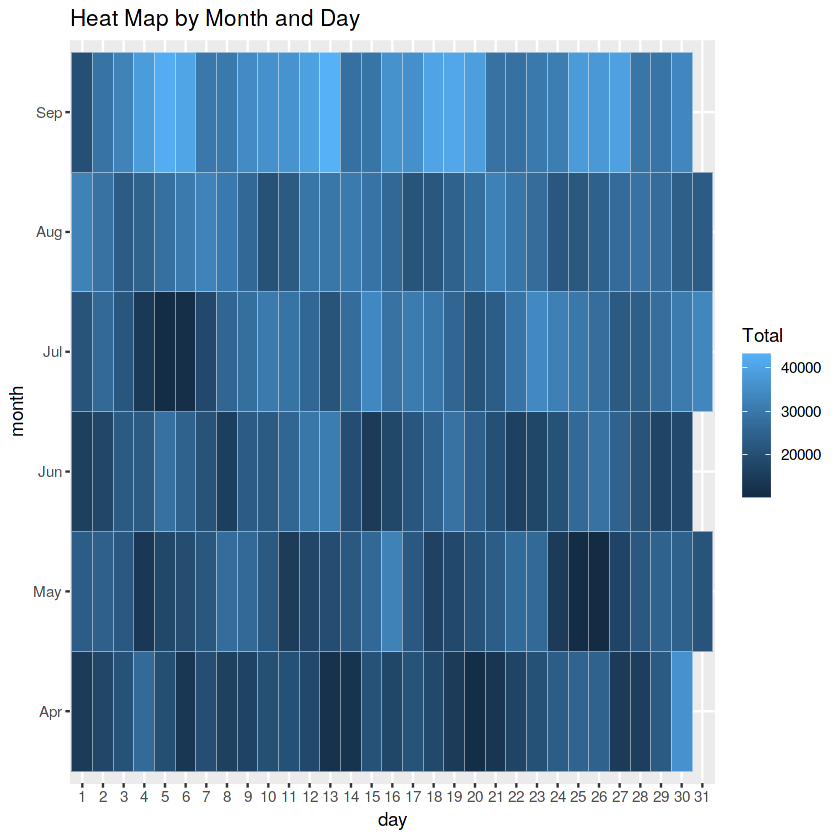

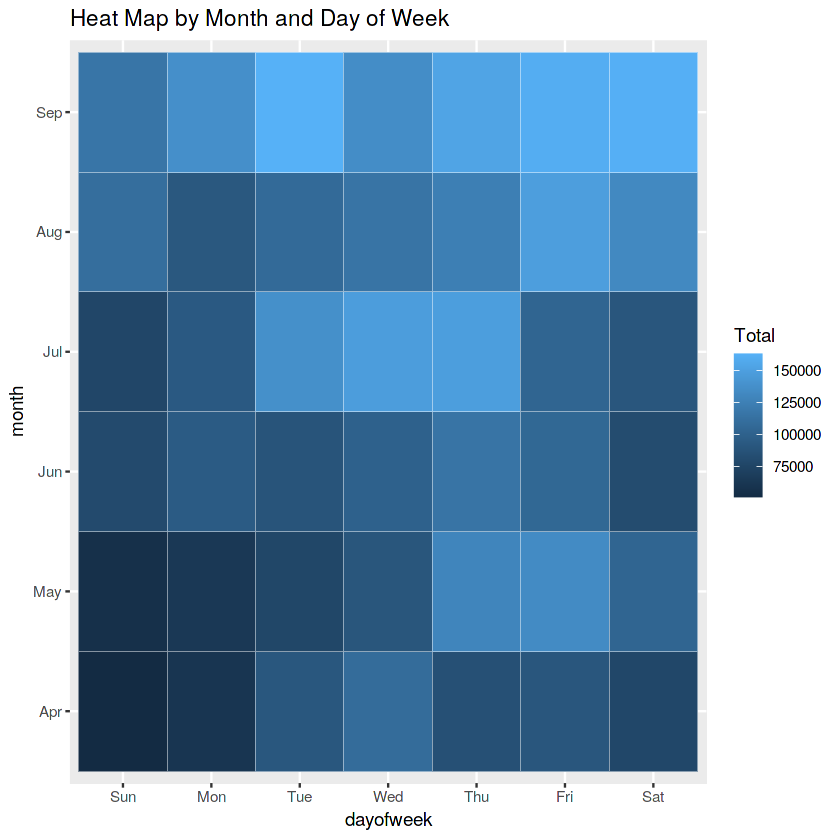

In [20]:
ggplot(day_month_group, aes(day, month, fill = Total)) +
  geom_tile(color = "white") +
  ggtitle("Heat Map by Month and Day")

ggplot(month_weekday, aes(dayofweek, month, fill = Total)) +
  geom_tile(color = "white") +
  ggtitle("Heat Map by Month and Day of Week")


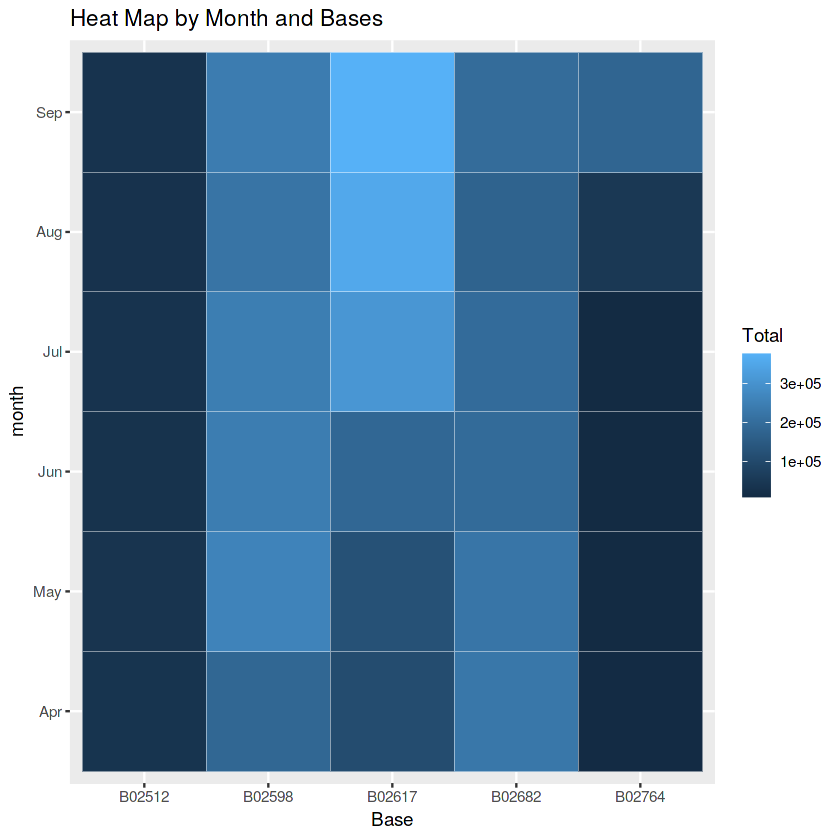

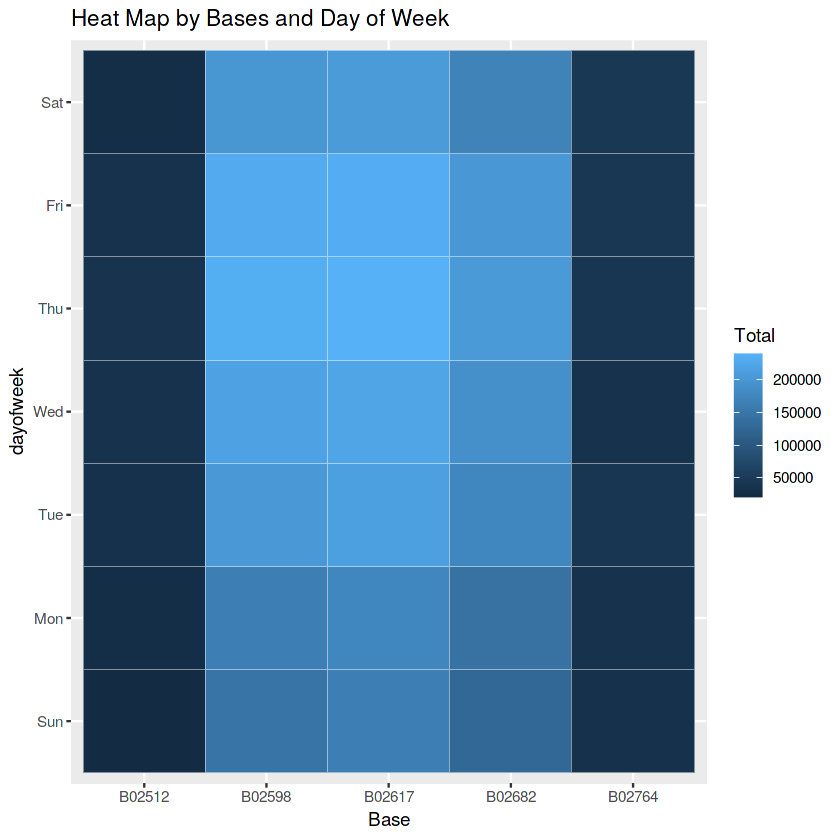

In [21]:
month_base <-  data_2014 %>%
  group_by(Base, month) %>%
  dplyr::summarize(Total = n()) 

day0fweek_bases <-  data_2014 %>%
  group_by(Base, dayofweek) %>%
  dplyr::summarize(Total = n()) 

ggplot(month_base, aes(Base, month, fill = Total)) +
  geom_tile(color = "white") +
  ggtitle("Heat Map by Month and Bases")

ggplot(day0fweek_bases, aes(Base, dayofweek, fill = Total)) +
  geom_tile(color = "white") +
  ggtitle("Heat Map by Bases and Day of Week")


Warning message:
“Removed 71701 rows containing missing values (geom_point).”


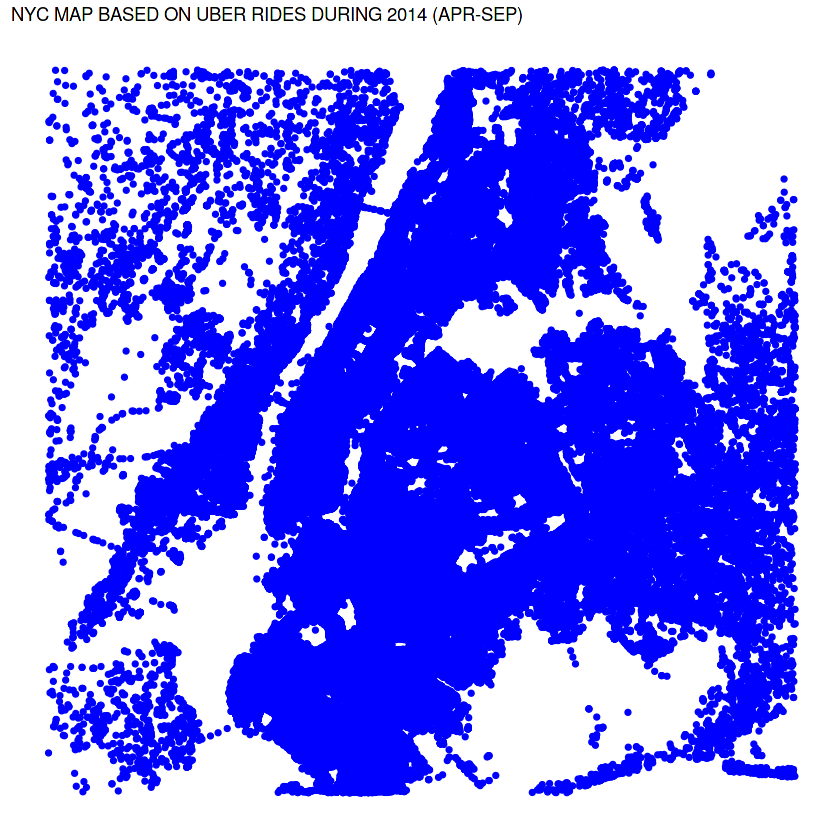

In [22]:
min_lat <- 40.5774
max_lat <- 40.9176
min_long <- -74.15
max_long <- -73.7004
ggplot(data_2014, aes(x=Lon, y=Lat)) +
  geom_point(size=1, color = "blue") +
  scale_x_continuous(limits=c(min_long, max_long)) +
  scale_y_continuous(limits=c(min_lat, max_lat)) +
  theme_map() +
  ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP)")

Warning message:
“Removed 71701 rows containing missing values (geom_point).”


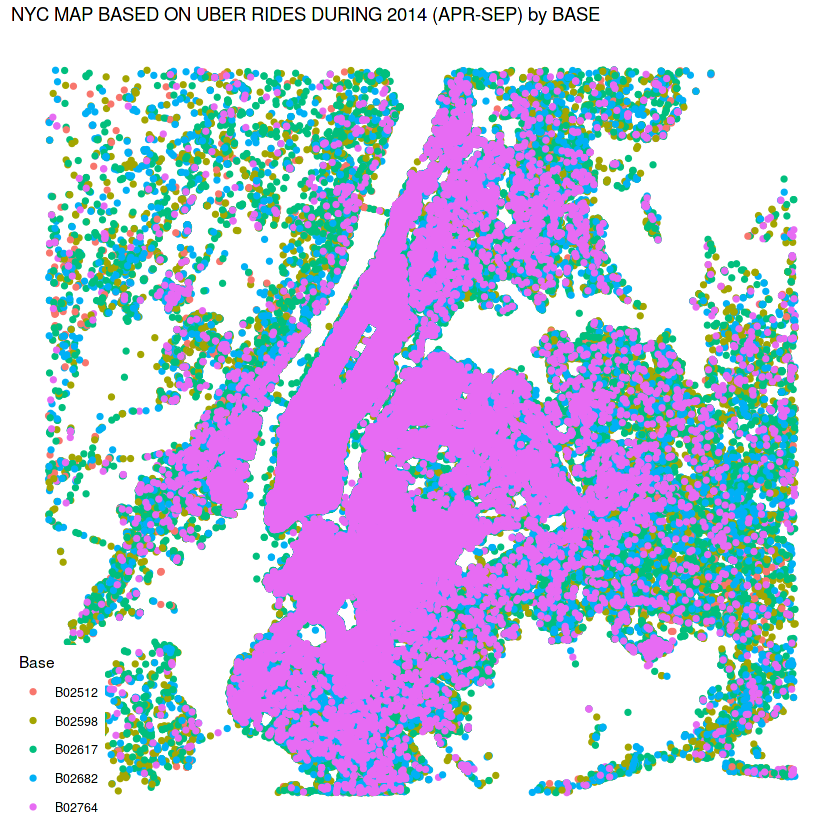

In [23]:
ggplot(data_2014, aes(x=Lon, y=Lat, color = Base)) +
  geom_point(size=1) +
  scale_x_continuous(limits=c(min_long, max_long)) +
  scale_y_continuous(limits=c(min_lat, max_lat)) +
  theme_map() +
  ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP) by BASE")